In [1]:
from langgraph.graph import StateGraph
from typing import Dict, TypedDict
# Defining a state schema for the agent
class AgentState(TypedDict):
    """State schema for the agent."""
    greeting: str

# Defining a greeting node 
def node1(state: AgentState) -> None:
    """Simple node that greets a user"""
    print(f'\n\nGiven Input from the Graph: \n{state}\n\n')
    print("Hello! Now we are executing the first node of the graph.")
    state['greeting'] = "Hello! I changed the greeting message in the state in the first node."
    print(f"State after node1 execution:\n{state}\n")

def node2(state: AgentState) -> None:
    """Simple node that asks for the user's name"""
    print(f'\n\nGiven Input from the Graph: \n{state}\n\n')
    print("Now we are executing the second node of the graph.")
    state['greeting'] = "Hello! I changed the greeting message in the state in the first node."
    print(f"State after node2 execution:\n{state}\n")

graph = StateGraph(AgentState) # Trying to define the StateGraph without a State Schema
graph.add_node("node1", node1)  # Adding the greeting node to the 
graph.add_node("node2", node2)  # Adding the second node to the graph
graph.add_edge("node1", "node2")  # Adding an edge from the greeting node to the second node
graph.set_entry_point("node1")  # Setting the entry point to the greeting node : graph.add_edge(START, "greeting")
graph.set_finish_point("node2")  # Setting the finish point to the greeting node : graph.add_edge("greeting", END)

# Compiling the graph
app = graph.compile()


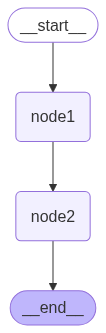

In [2]:
from IPython.display import display, Image 
display( Image(
    app.get_graph().draw_mermaid_png()
))

In [3]:
input = { 'check_input': 'This is a test input' } # This is not similar to the State Schema defined above

app.invoke(input)  



Given Input from the Graph: 
{}


Hello! Now we are executing the first node of the graph.
State after node1 execution:
{'greeting': 'Hello! I changed the greeting message in the state in the first node.'}



Given Input from the Graph: 
{}


Now we are executing the second node of the graph.
State after node2 execution:
{'greeting': 'Hello! I changed the greeting message in the state in the first node.'}



In [5]:
input2 = { 'greeting': 'This is a test input' } # This is similar to the State Schema defined above
result = app.invoke(input2)  # This should work as the input matches the state schema



Given Input from the Graph: 
{'greeting': 'This is a test input'}


Hello! Now we are executing the first node of the graph.
State after node1 execution:
{'greeting': 'Hello! I changed the greeting message in the state in the first node.'}



Given Input from the Graph: 
{'greeting': 'This is a test input'}


Now we are executing the second node of the graph.
State after node2 execution:
{'greeting': 'Hello! I changed the greeting message in the state in the first node.'}



In [6]:
print(result)

{'greeting': 'This is a test input'}


## Transferring the Changing State across the nodes

In [9]:
from langgraph.graph import StateGraph
from typing import Dict, TypedDict
# Defining a state schema for the agent
class AgentState(TypedDict):
    """State schema for the agent."""
    greeting: str

# Defining a greeting node 
def node1(state: AgentState) -> AgentState:
    """Simple node that greets a user"""
    print(f'\n\nGiven Input from the Graph: \n{state}\n\n')
    print("Hello! Now we are executing the first node of the graph.")
    state['greeting'] = "Hello! I changed the greeting message in the state in the first node."
    print(f"State after node1 execution:\n{state}\n")

    return state # Returning the modified state

def node2(state: AgentState) -> AgentState:
    """Simple node that asks for the user's name"""
    print(f'\n\nGiven Input from the Graph: \n{state}\n\n')
    print("Now we are executing the second node of the graph.")
    state['greeting'] = "Hello! I changed the greeting message in the state in the second node."
    print(f"State after node2 execution:\n{state}\n")

    return state  # Returning the modified state

graph = StateGraph(AgentState) # Trying to define the StateGraph without a State Schema
graph.add_node("node1", node1)  # Adding the greeting node to the 
graph.add_node("node2", node2)  # Adding the second node to the graph
graph.add_edge("node1", "node2")  # Adding an edge from the greeting node to the second node
graph.set_entry_point("node1")  # Setting the entry point to the greeting node : graph.add_edge(START, "greeting")
graph.set_finish_point("node2")  # Setting the finish point to the greeting node : graph.add_edge("greeting", END)

# Compiling the graph
app = graph.compile()

In [10]:
input2 = { 'greeting': 'This is a test input' } # This is similar to the State Schema defined above
result = app.invoke(input2)  # This should work as the input matches the state schema



Given Input from the Graph: 
{'greeting': 'This is a test input'}


Hello! Now we are executing the first node of the graph.
State after node1 execution:
{'greeting': 'Hello! I changed the greeting message in the state in the first node.'}



Given Input from the Graph: 
{'greeting': 'Hello! I changed the greeting message in the state in the first node.'}


Now we are executing the second node of the graph.
State after node2 execution:
{'greeting': 'Hello! I changed the greeting message in the state in the second node.'}



In [11]:
print(result)

{'greeting': 'Hello! I changed the greeting message in the state in the second node.'}
